This code will create a bar chart with the performance metrics (accuracy, precision, recall, and F1 score) for each model, making it easier to compare the performance of different models visually. The legend is placed outside the chart to avoid overlapping with the bars.

c:\Users\AI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\AI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\AI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Model', ylabel='Accuracy'>

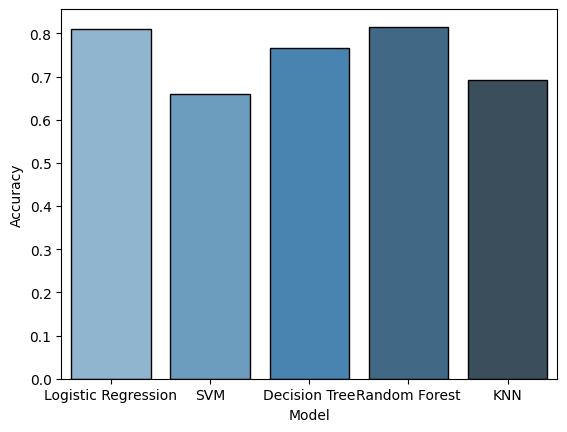

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

df = sns.load_dataset("titanic")
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
y = df['survived']
X = pd.get_dummies(X, columns=['sex']) # one hot encoding
X.age.fillna(value = X['age'].mean(), inplace=True)   # fill missing values with mean

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # split data

models = [LogisticRegression(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier()]
model_names = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'KNN']

metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
metric_scores = []

# Loop through each model and calculate the performance metrics
for model, model_name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    metric_scores.append([model_name, accuracy, precision, recall, f1])

# Convert the results to a DataFrame for easier plotting
metrics_df = pd.DataFrame(metric_scores, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])


sns.barplot(x='Model', y='Accuracy', data=metrics_df, palette='Blues_d',edgecolor='black', linewidth=1)
